In [63]:
import numpy as np 
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport

import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import style


# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Ensembling Techniques
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier,RandomForestClassifier

# Probelm Definition 
Following are the Problems that are being addressed 

#1.Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

#2.We are going to determine the Correlation of each loan transaction's Effect of target variable 

In [4]:
pd.set_option('display.max_columns', 40)

In [3]:
df=pd.read_csv("MSIData.csv")
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  20-07-2016  
1  10-08-2016  
2  19-08-2016  
3  06-06-2016  
4  22-06-2016  

[5 rows x 37 columns]

In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

# Variable Definition

#Variable-Definition

#label-Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success,0:failure}

#msisdn-mobile number of user

#aon-age on cellular network in days

#daily_decr30-Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

#daily_decr90	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

#rental30	Average main account balance over last 30 days

#rental90	Average main account balance over last 90 days

#last_rech_date_ma	Number of days till last recharge of main account

#last_rech_date_da	Number of days till last recharge of data account

#last_rech_amt_ma	Amount of last recharge of main account (in Indonesian Rupiah)

#cnt_ma_rech30	Number of times main account got recharged in last 30 days

#fr_ma_rech30	Frequency of main account recharged in last 30 days

#sumamnt_ma_rech30	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

#medianamnt_ma_rech30	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

#medianmarechprebal30	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

#cnt_ma_rech90	Number of times main account got recharged in last 90 days

#fr_ma_rech90	Frequency of main account recharged in last 90 days

#sumamnt_ma_rech90	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

#medianamnt_ma_rech90	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

#medianmarechprebal90	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

#cnt_da_rech30	Number of times data account got recharged in last 30 days

#fr_da_rech30	Frequency of data account recharged in last 30 days

#cnt_da_rech90	Number of times data account got recharged in last 90 days

#fr_da_rech90	Frequency of data account recharged in last 90 days

#cnt_loans30	Number of loans taken by user in last 30 days

#amnt_loans30	Total amount of loans taken by user in last 30 days

#maxamnt_loans30	maximum amount of loan taken by the user in last 30 days

#medianamnt_loans30	Median of amounts of loan taken by the user in last 30 days

#cnt_loans90	Number of loans taken by user in last 90 days

#amnt_loans90	Total amount of loans taken by user in last 90 days

#maxamnt_loans90	maximum amount of loan taken by the user in last 90 days

#medianamnt_loans90	Median of amounts of loan taken by the user in last 90 days

#payback30	Average payback time in days over last 30 days

#payback90	Average payback time in days over last 90 days

#pcircle-telecom circle

#pdate-date


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

There are No Null values in the dataset

# EDA and Data Cleaning 

1    87.5%
0    12.5%
Name: label, dtype: object


label
0     26162
1    183431
dtype: int64

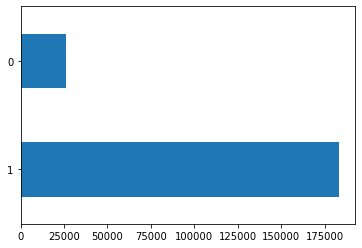

In [7]:
df["label"].value_counts().plot(kind='barh')
percent100 = df.label.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(percent100)
df.groupby("label").size()

we can observe that data is not highly deviated it has 12.5% of defaulters and 87.5% of Non- defaulters

In [8]:
df["pcircle"].value_counts()
#Following Column can be dropped 

UPW    209593
Name: pcircle, dtype: int64

In [9]:
df.drop("pcircle",axis=1,inplace=True)

In [10]:
#Changing Data types 
df["pdate"]= pd.to_datetime(df["pdate"])

In [11]:
print("Data is from:",df["pdate"].min() ,"to", df["pdate"].max())

Data is from: 2016-01-06 00:00:00 to 2016-12-08 00:00:00


In [12]:
#Column pdate describes that the data delongs to year 2016 and it is not going to have any effect of the model creation 
df.drop("pdate",axis=1,inplace=True)

In [13]:
#Column msisdn wont have any effect of the model so we can drop the follwoing column
df.drop("msisdn",axis=1,inplace=True)

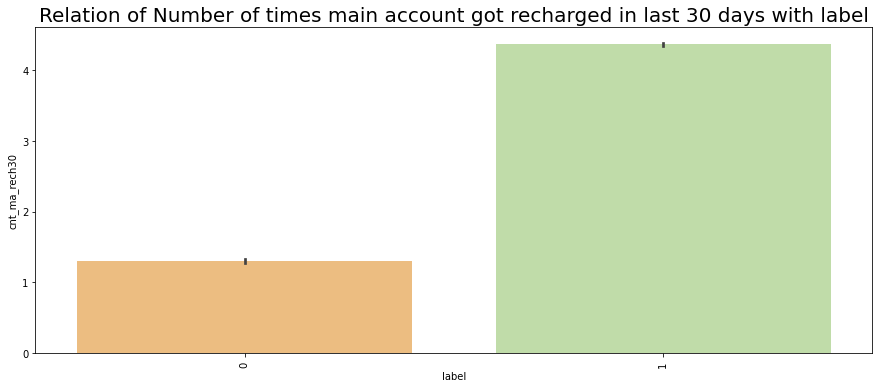

In [14]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'label', y = 'cnt_ma_rech30', data = df, palette = 'Spectral')
plt.xticks(rotation = 90)
plt.title('Relation of Number of times main account got recharged in last 30 days with label', fontsize = 20)
plt.show()

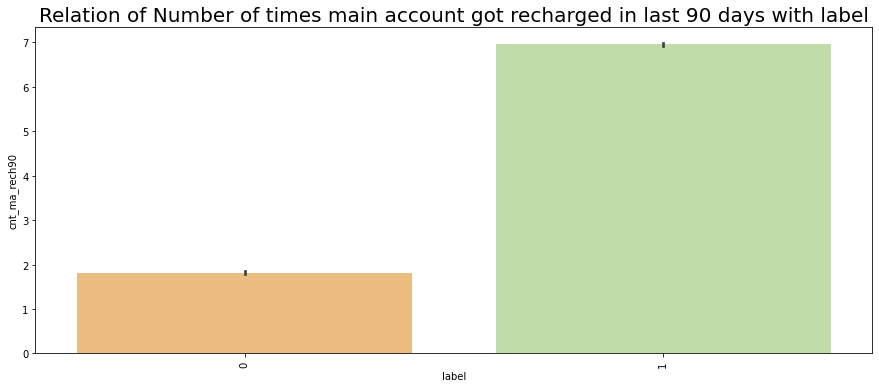

In [15]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'label', y = 'cnt_ma_rech90', data = df, palette = 'Spectral')
plt.xticks(rotation = 90)
plt.title('Relation of Number of times main account got recharged in last 90 days with label', fontsize = 20)
plt.show()

In [31]:
df['aon'] = df['aon'].astype(float)

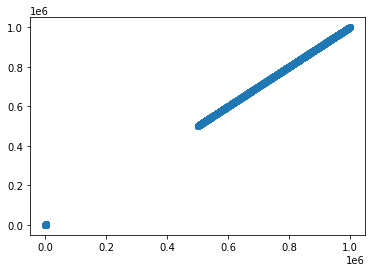

In [32]:
plt.scatter("aon","aon",data=df)

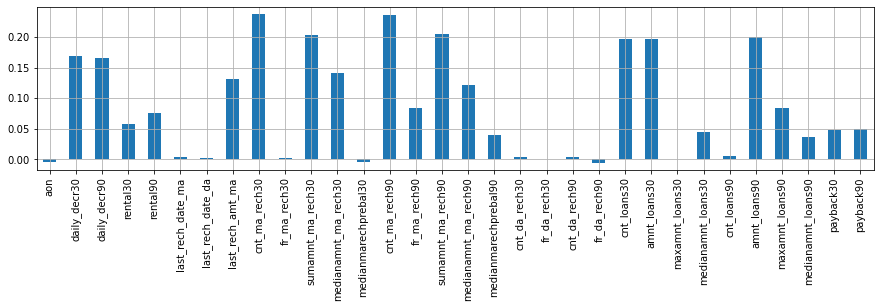

In [99]:
plt.figure(figsize=(15,3))
df.drop("label",axis=1).corrwith(df["label"]).plot(kind="bar",grid=True)
plt.xticks(rotation=90)
plt.show()

In [22]:
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.338432    5381.402289    6082.515068   
std         0.330519   75696.033577    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.000000  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000       209593.00000      209593.000000   
mean     2692.581910    3483.406534         3755.84780        3712.202921   
std      4308.586781    5770.461279        53905.89223       53374.833430   
min    -23737.140000  -24720.580000          -29.00000         -29.000000   
25%       280.420000     300.260000            1.00000           0.000000   
50%      1083.570000    1334.000000            3.00000           0.000000   
75%      3356.940000    4201.790000            7.00000           0.000000   
max    198926.110000  200148.110000       998650.37770      999171.809400   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209593.000000  209593.000000  209593.000000      209593.000000   
mean        2064.452797       3.978057    3737.355121        7704.501157   
std         2370.786034       4.256090   53643.625172       10139.621714   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368100      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         209593.000000         209593.000000   209593.00000   
mean            1812.817952           3851.927942        6.31543   
std             2070.864620          54006.374433        7.19347   
min                0.000000           -200.000000        0.00000   
25%              770.000000             11.000000        2.00000   
50%             1539.000000             33.900000        4.00000   
75%             1924.000000             83.000000        8.00000   
max            55000.000000         999479.419300      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   
mean        7.716780       12396.218352           1864.595821   
std        12.590251       16857.793882           2081.680664   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240100      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  209593.000000  209593.000000  209593.000000    20959

Data is inconsistant and contains few unreal values which has to be handled by removing outliers and unreal values from the data 

In [20]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

There is skewness present in the data let us perfome removal of outliers and see what is loss of data in each case

In [23]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
print("\n Original Shape", df.shape, "New Shape",df_new.shape)

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))

 Original Shape (209593, 33) New Shape (161465, 33)


In [24]:
Percntage_loss=((209593-161465)/209593)*100
print("\nPercentage loss:",Percntage_loss)


Percentage loss: 22.962598941758554


In [25]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

label                       0.000
aon                       736.000
daily_decr30             7201.560
daily_decr90             7760.098
rental30                 3076.520
rental90                 3901.530
last_rech_date_ma           6.000
last_rech_date_da           0.000
last_rech_amt_ma         1539.000
cnt_ma_rech30               4.000
fr_ma_rech30                6.000
sumamnt_ma_rech30        8470.000
medianamnt_ma_rech30     1154.000
medianmarechprebal30       72.000
cnt_ma_rech90               6.000
fr_ma_rech90                8.000
sumamnt_ma_rech90       13683.000
medianamnt_ma_rech90     1151.000
medianmarechprebal90       64.710
cnt_da_rech30               0.000
fr_da_rech30                0.000
cnt_da_rech90               0.000
fr_da_rech90                0.000
cnt_loans30                 3.000
amnt_loans30               18.000
maxamnt_loans30             0.000
medianamnt_loans30          0.000
cnt_loans90                 4.000
amnt_loans90               24.000
maxamnt_loans9

In [26]:
df.new1=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df.new1.shape

<ipython-input-26-9d51cf07a9f7>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.new1=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


(56628, 33)

In [27]:
q_low = df["medianmarechprebal90"].quantile(0.01)
q_hi  = df["medianmarechprebal90"].quantile(0.99)

df_filtered = df[(df["medianmarechprebal90"] < q_hi) & (df["medianmarechprebal90"] > q_low)]

In [28]:
df_filtered .shape

(182376, 33)

In [29]:
Percntage_loss=((209593-184262)/209593)*100
print("\nPercentage loss:",Percntage_loss)


Percentage loss: 12.085804392322261


We are going to remove the outliers one by one according to observations made 

Text(0.5, 1.0, 'Data distribution of Column aon')

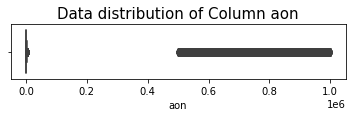

In [109]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df.aon)
plt.title('Data distribution of Column aon', fontsize = 15)

In [34]:
q_low = df["aon"].quantile(0.01)
q_hi  = df["aon"].quantile(0.99)

df_filtered = df[(df["aon"] < q_hi) & (df["aon"] > q_low)]

Text(0.5, 1.0, 'Data distribution of Column last_rech_date_ma')

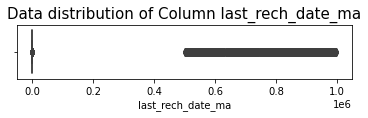

In [110]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df.last_rech_date_ma)
plt.title('Data distribution of Column last_rech_date_ma', fontsize = 15)

In [36]:
q_hi  = df_filtered["last_rech_date_ma"].quantile(0.991)

df_filtered = df_filtered[(df_filtered["last_rech_date_ma"] < q_hi)]

Text(0.5, 1.0, 'Data distribution of Column last_rech_date_da')

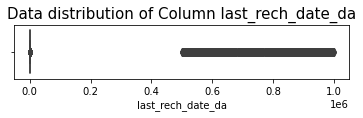

In [111]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df.last_rech_date_da)
plt.title('Data distribution of Column last_rech_date_da', fontsize = 15)

In [38]:
q_hi  = df_filtered["last_rech_date_da"].quantile(0.995)

df_filtered = df_filtered[(df_filtered["last_rech_date_da"] < q_hi)]

Text(0.5, 1.0, 'Data distribution of Column medianmarechprebal30')

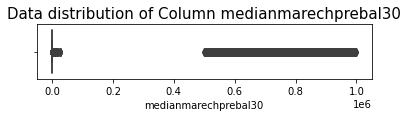

In [112]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df.medianmarechprebal30)
plt.title('Data distribution of Column medianmarechprebal30', fontsize = 15)

In [40]:
q_hi  = df_filtered["medianmarechprebal30"].quantile(0.99)

df_filtered = df_filtered[(df_filtered["medianmarechprebal30"] < q_hi)]

Text(0.5, 1.0, 'Data distribution of Column fr_ma_rech30')

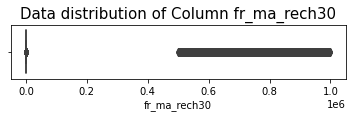

In [113]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df.fr_ma_rech30)
plt.title('Data distribution of Column fr_ma_rech30', fontsize = 15)

In [42]:
q_hi  = df_filtered["fr_ma_rech30"].quantile(0.991)

df_filtered = df_filtered[(df_filtered["fr_ma_rech30"] < q_hi)]

In [43]:
df_filtered.drop(["cnt_da_rech30" ,"fr_da_rech30" ,"cnt_da_rech90" , "fr_da_rech90"],axis=1,inplace=True)

Text(0.5, 1.0, 'Data distribution of Column maxamnt_loans30')

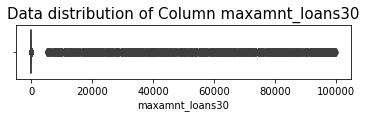

In [114]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df.maxamnt_loans30)
plt.title('Data distribution of Column maxamnt_loans30', fontsize = 15)

In [45]:
df_filtered['maxamnt_loans30'] = np.where(df_filtered['maxamnt_loans30'] > 6, 12, df_filtered['maxamnt_loans30'])

Text(0.5, 1.0, 'Data distribution of Column cnt_loans90')

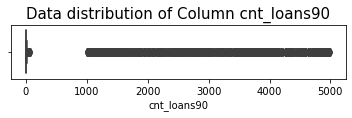

In [115]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df.cnt_loans90)
plt.title('Data distribution of Column cnt_loans90', fontsize = 15)

In [47]:
q_hi  = df_filtered["cnt_loans90"].quantile(0.995)

df_filtered = df_filtered[(df_filtered["cnt_loans90"] < q_hi)]

Text(0.5, 1.0, 'Data distribution of Column medianmarechprebal90')

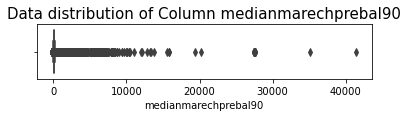

In [116]:
plt.figure(figsize=(6,1))
sns.boxplot(x=df.medianmarechprebal90)
plt.title('Data distribution of Column medianmarechprebal90', fontsize = 15)

In [49]:
q_hi  = df_filtered["medianmarechprebal90"].quantile(0.999)

df_filtered = df_filtered[(df_filtered["medianmarechprebal90"] < q_hi)]

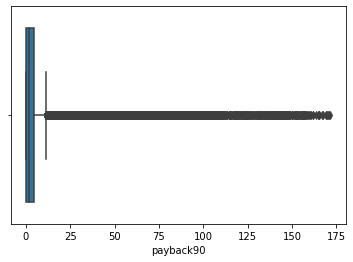

In [50]:
sns.boxplot(x=df_filtered.payback90)


In [51]:
df_filtered.shape

(197228, 29)

In [52]:
df_filtered.describe()

label            aon   daily_decr30   daily_decr90  \
count  197228.000000  197228.000000  197228.000000  197228.000000   
mean        0.877862     661.511398    5441.235267    6148.798922   
std         0.327446     497.031528    9201.256633   10902.279283   
min         0.000000      56.000000     -93.012667     -93.012667   
25%         1.000000     250.000000      44.705333      44.914250   
50%         1.000000     526.000000    1550.566666    1590.000000   
75%         1.000000     968.000000    7366.751750    7954.720000   
max         1.000000    2420.000000  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  197228.000000  197228.000000      197228.000000      197228.000000   
mean     2705.249853    3501.407156           5.743688           0.933818   
std      4297.745103    5758.909738           8.472221           7.028770   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       292.255000     314.407500           1.000000           0.000000   
50%      1099.620000    1359.050000           3.000000           0.000000   
75%      3385.385000    4239.532500           7.000000           0.000000   
max    198926.110000  200148.110000          59.000000         113.000000   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     197228.000000  197228.000000  197228.000000      197228.000000   
mean        2051.548218       4.034848       3.807639        7763.924128   
std         2339.962049       4.237610       5.112283       10073.066782   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1546.000000   
50%         1539.000000       3.000000       2.000000        4639.000000   
75%         2309.000000       6.000000       6.000000       10027.000000   
max        55000.000000      99.000000      26.000000      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         197228.000000         197228.000000  197228.000000   
mean            1806.760006             80.286580       6.398990   
std             2032.426634            139.923338       7.158103   
min                0.000000           -200.000000       0.000000   
25%              770.000000             11.000000       2.000000   
50%             1539.000000             33.535000       4.000000   
75%             1924.000000             81.400000       9.000000   
max            55000.000000           1334.540000     172.000000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  197228.000000      197228.000000         197228.000000   
mean        7.661458       12470.607541           1846.003940   
std        12.505650       16753.378616           2035.154606   
min         0.000000           0.000000              0.000000   
25%         0.000000        2320.000000            773.000000   
50%         2.000000        7422.500000           1539.000000   
75%         8.000000       16167.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count         197228.000000  197228.000000  197228.000000    197228.000000   
mean              77.189859       2.798092      18.210518         6.695926   
std              135.395811       2.563195      17.444517         2.186960   
min             -200.000000       0.000000       0.000000         0.000000   
25%               14.757500       1.000000       6.000000         6.000000   
50%               35.800000       2.000000      12.000000         6.000000   
75%               78.500000       4.000000      24.000000         6.000000   
max             1824.000000      50.000000     306.000000        12.000000   

       medianamnt_loans30    cnt_loans90   amnt_loans90  maxamnt_loans90  \
count       197228.000000  197228.00

In [53]:
Percntage_loss=((209593-197228)/209593)*100
print("\nPercentage loss:",Percntage_loss)


Percentage loss: 5.89952908732639


In [54]:
df_filtered.skew()

label                  -2.307961
aon                     0.952609
daily_decr30            3.876809
daily_decr90            4.217147
rental30                4.541807
rental90                4.460486
last_rech_date_ma       2.616534
last_rech_date_da       9.641994
last_rech_amt_ma        3.763906
cnt_ma_rech30           2.732371
fr_ma_rech30            1.748665
sumamnt_ma_rech30       6.460758
medianamnt_ma_rech30    3.433134
medianmarechprebal30    3.564060
cnt_ma_rech90           2.912249
fr_ma_rech90            2.315961
sumamnt_ma_rech90       4.904062
medianamnt_ma_rech90    3.658529
medianmarechprebal90    4.258878
cnt_loans30             2.640773
amnt_loans30            2.907786
maxamnt_loans30         1.408361
medianamnt_loans30      4.586326
cnt_loans90             2.843786
amnt_loans90            3.025443
maxamnt_loans90         1.679242
medianamnt_loans90      4.946312
payback30               8.288442
payback90               6.870631
dtype: float64

Most of the skewness has been removed from the data 

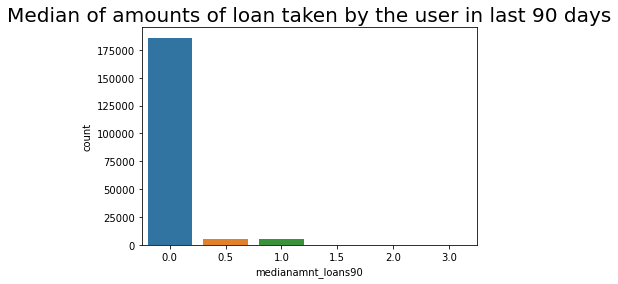

In [56]:
sns.countplot(df_filtered.medianamnt_loans90)
plt.title('Median of amounts of loan taken by the user in last 90 days', fontsize = 20)
plt.show()

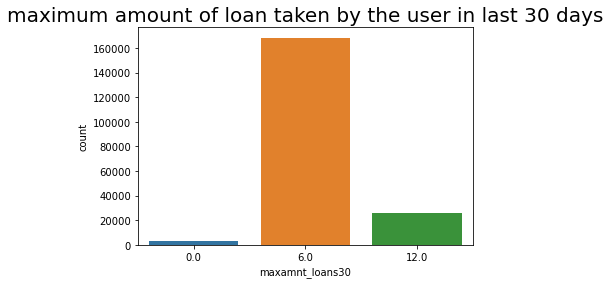

In [57]:
sns.countplot(df_filtered.maxamnt_loans30)
plt.title('maximum amount of loan taken by the user in last 30 days', fontsize = 20)
plt.show()


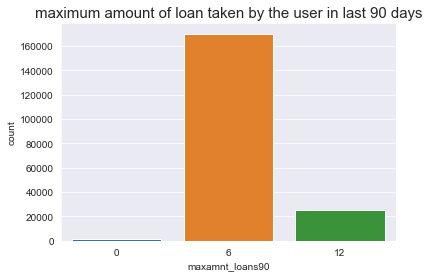

In [123]:
sns.countplot(df_filtered.maxamnt_loans90)
plt.title('maximum amount of loan taken by the user in last 90 days', fontsize = 15)
plt.show()

label                  0         1
maxamnt_loans90                   
0                    NaN    1864.0
6                23112.0  146893.0
12                 977.0   24382.0


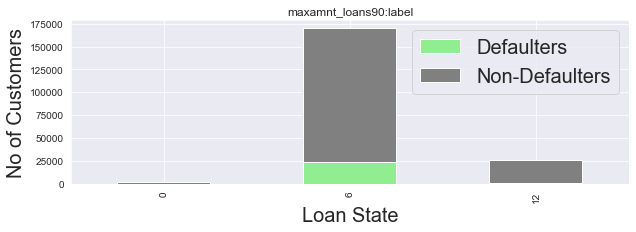

In [125]:
sns.set_style('darkgrid')
f, axes = plt.subplots(1,1, figsize = (10,3))

label = df_filtered.groupby(['maxamnt_loans90','label']).maxamnt_loans90.count().unstack()
print (label)
p1 = label.plot(kind = 'bar', stacked = True, 
                   title = 'maxamnt_loans90:label', 
                   color = ['lightgreen','grey'], alpha = 1, ax = axes)
p1.set_xlabel('Loan State',size=20)
p1.set_ylabel('No of Customers',size=20)
p1.legend(['Defaulters','Non-Defaulters'],prop={"size":20})
plt.show()

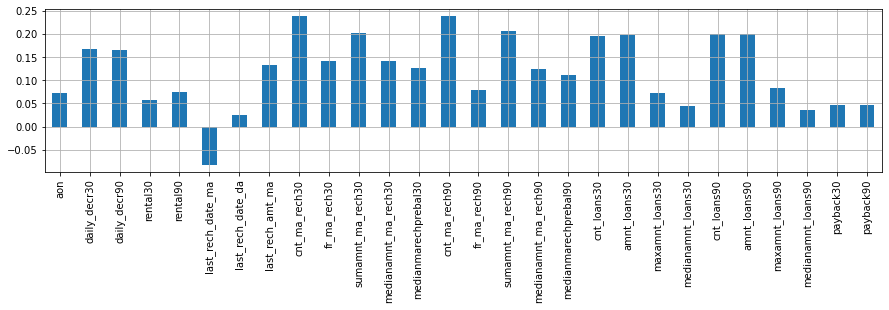

In [101]:
plt.figure(figsize=(15,3))
df_filtered.drop("label",axis=1).corrwith(df_filtered["label"]).plot(kind="bar",grid=True)
plt.xticks(rotation=90)
plt.show()

Correlation graph which shows the relatio of each variable to that of target variable

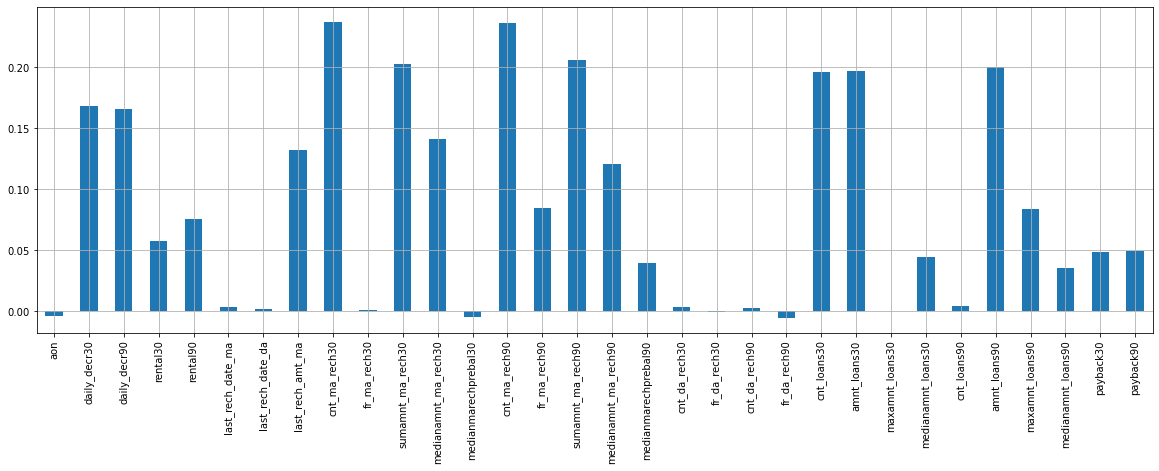

In [60]:
plt.figure(figsize=(20,6))
df.drop("label",axis=1).corrwith(df["label"]).plot(kind="bar",grid=True)
plt.xticks(rotation=90)
plt.show()

The data is showing good Correlation after the data cleaning let us go ahead with model building 

# Building Machine Learning Models

In [61]:
y=df_filtered["label"]
x=df_filtered.drop("label", axis=1)
print("\n X Shape", x.shape, "Y Shape",y.shape)


 X Shape (197228, 28) Y Shape (197228,)


In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lr=LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [64]:
max_scr=0
for i in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,2)==round(accuracy_score(y_test,pred_test)*100,2):
    #if accuracy_score(y_train,pred_train)*100>max_scr:  
        max_scr=accuracy_score(y_train,pred_train)*100
        print("At random state",i,"The model Perfomes very well")
        print("Training accuracy_score is:",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:",accuracy_score(y_test,pred_test), end = "\n\n\n")

At random state 52 The model Perfomes very well
Training accuracy_score is: 87.84652241700574
Testing accuracy_score is: 0.8785174669167977




In [65]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=52)
num_folds = 10
seed = 52
scoring = 'accuracy'

In [66]:
models= [
    ("Logistic Regression",LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Naive Bayes",GaussianNB()),
    ("Perceptron",Perceptron())
    ]

In [67]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.878358 (0.003332)
Decision Tree: 0.868211 (0.002433)
Naive Bayes: 0.591354 (0.003570)
Perceptron: 0.846504 (0.028462)


Logistic Regressor and Decision Tree is perfoming well with the data set let us Hyperparmeter tune and check if can improve the score 

In [68]:
#Parameter of Scaling Logistic Regression

c_values = [100, 10, 1.0, 0.1, 0.01]
param_grid = dict(C=c_values, solver=['newton-cg', 'lbfgs', 'liblinear'],penalty=['l2'])
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.878484 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
#14 0.878250 (0.003245) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
#10 0.878332 (0.003283) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
#14 0.878250 (0.003245) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
#13 0.878256 (0.003266) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
#8 0.878351 (0.003264) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
#12 0.878262 (0.003274) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
#9 0.878351 (0.003192) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
#6 0.878358 (0.003332) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
#7 0.878358 (0.003186) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
#1 0.878484 (0.003178) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
#2 0.878465 (0.003163) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
#3 0.878434 (0.003214) with: {'C': 0.1, 'penalty': 'l2', 'solv

In [69]:
#DecisionTree Hyper Parameter Tuning

criterion=["gini", "entropy"]
splitter=["best", "random"]
max_depth = [2,4,6,8,10,12,None]
param_grid = dict(splitter=splitter,criterion=criterion,max_depth =max_depth )
model = DecisionTreeClassifier()
kfold = KFold(n_splits=num_folds, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.910503 using {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}
#11 0.903734 (0.002964) with: {'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}
#21 0.877946 (0.003184) with: {'criterion': 'gini', 'max_depth': 2, 'splitter': 'random'}
#9 0.904444 (0.002882) with: {'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}
#24 0.877927 (0.003161) with: {'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}
#7 0.905794 (0.003335) with: {'criterion': 'gini', 'max_depth': 6, 'splitter': 'best'}
#20 0.878288 (0.002744) with: {'criterion': 'gini', 'max_depth': 6, 'splitter': 'random'}
#3 0.909825 (0.002941) with: {'criterion': 'gini', 'max_depth': 8, 'splitter': 'best'}
#18 0.878903 (0.003666) with: {'criterion': 'gini', 'max_depth': 8, 'splitter': 'random'}
#2 0.910250 (0.002741) with: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}
#14 0.883326 (0.002299) with: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}
#6 0.908202 (0.003115) with: 

In [70]:
models= [AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier(),RandomForestClassifier()]
names = []

for m in models:
    m.fit(x_train, y_train)
    m.score(x_train, y_train)
    predm = m.predict(x_test)
    names.append(m)
    msg = "%s:" % (names)
    print(msg)
    print(accuracy_score(y_test, predm)) 
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test, predm))
    print("****************************************************************")
    print("\n")

[AdaBoostClassifier()]:
0.9061501799929017
[[ 1456  3375]
 [  327 34288]]
              precision    recall  f1-score   support

           0       0.82      0.30      0.44      4831
           1       0.91      0.99      0.95     34615

    accuracy                           0.91     39446
   macro avg       0.86      0.65      0.69     39446
weighted avg       0.90      0.91      0.89     39446

****************************************************************


[AdaBoostClassifier(), GradientBoostingClassifier()]:
0.9111697003498453
[[ 1689  3142]
 [  362 34253]]
              precision    recall  f1-score   support

           0       0.82      0.35      0.49      4831
           1       0.92      0.99      0.95     34615

    accuracy                           0.91     39446
   macro avg       0.87      0.67      0.72     39446
weighted avg       0.90      0.91      0.89     39446

****************************************************************


[AdaBoostClassifier(), GradientBoo

In [78]:
GBC= GradientBoostingClassifier(n_estimators = 200,random_state=seed)
GBC.fit(x_train, y_train)
predictions = GBC.predict(x_test)
print(accuracy_score(y_test, predictions)*100 )
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

91.33245449475233
[[ 1877  2954]
 [  465 34150]]
              precision    recall  f1-score   support

           0       0.80      0.39      0.52      4831
           1       0.92      0.99      0.95     34615

    accuracy                           0.91     39446
   macro avg       0.86      0.69      0.74     39446
weighted avg       0.91      0.91      0.90     39446



0.6875494561775174

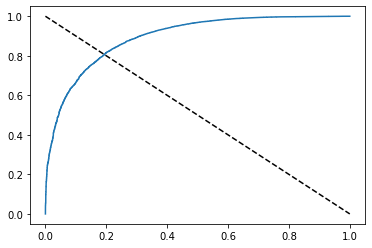

In [82]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_rc=GBC.predict_proba(x_test)[:,1]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_rc)
plt.plot([0,1],[1,0],"k--")
plt.plot(tpr,fpr,label="DTC")
auc_score = roc_auc_score(y_test, GBC.predict(x_test))
auc_score

In [73]:
DTC= DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, splitter= 'best')
DTC.fit(x_train, y_train)
predictions = DTC.predict(x_test)
print(accuracy_score(y_test, predictions)*100 )
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

91.10936470111038
[[ 1907  2924]
 [  583 34032]]
              precision    recall  f1-score   support

           0       0.77      0.39      0.52      4831
           1       0.92      0.98      0.95     34615

    accuracy                           0.91     39446
   macro avg       0.84      0.69      0.74     39446
weighted avg       0.90      0.91      0.90     39446



0.6889499400104883

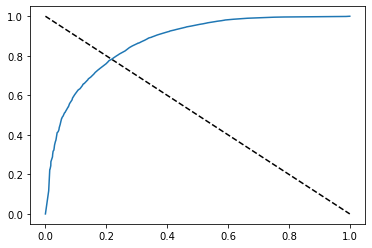

In [74]:
y_pred_rc=DTC.predict_proba(x_test)[:,1]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_rc)
plt.plot([0,1],[1,0],"k--")
plt.plot(tpr,fpr,label="DTC")
auc_score = roc_auc_score(y_test, DTC.predict(x_test))
auc_score

In [85]:
LR= LogisticRegression(C = 0.1, penalty = 'l2', solver = 'newton-cg')
LR.fit(x_train, y_train)
predictions = LR.predict(x_test)
print(accuracy_score(y_test, predictions)*100 )
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

87.85174669167976
[[  224  4607]
 [  185 34430]]
              precision    recall  f1-score   support

           0       0.55      0.05      0.09      4831
           1       0.88      0.99      0.93     34615

    accuracy                           0.88     39446
   macro avg       0.71      0.52      0.51     39446
weighted avg       0.84      0.88      0.83     39446



0.52051135396479

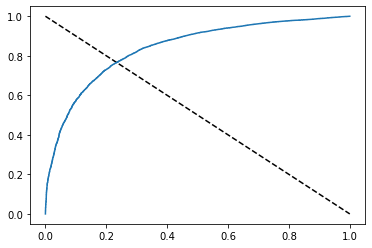

In [86]:
y_pred_rc=LR.predict_proba(x_test)[:,1]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_rc)
plt.plot([0,1],[1,0],"k--")
plt.plot(tpr,fpr,label="LR")
auc_score = roc_auc_score(y_test, LR.predict(x_test))
auc_score

In [80]:
RFC= RandomForestClassifier(criterion= 'gini',max_features= 'sqrt', n_estimators = 1000)
RFC.fit(x_train, y_train)
predictions = RFC.predict(x_test)
print(accuracy_score(y_test, predictions)*100 )
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

91.4237185012422
[[ 2094  2737]
 [  646 33969]]
              precision    recall  f1-score   support

           0       0.76      0.43      0.55      4831
           1       0.93      0.98      0.95     34615

    accuracy                           0.91     39446
   macro avg       0.84      0.71      0.75     39446
weighted avg       0.91      0.91      0.90     39446



0.7073941008783582

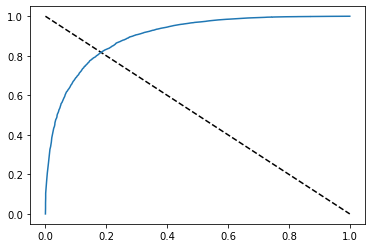

In [81]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_rc=RFC.predict_proba(x_test)[:,1]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_rc)
plt.plot([0,1],[1,0],"k--")
plt.plot(tpr,fpr,label="RandomForestClassifier")
auc_score = roc_auc_score(y_test, RFC.predict(x_test))
auc_score

In [126]:
import pickle
filename="RFCMFI.pkl"
pickle.dump(RFC,open(filename,"wb"))

In [127]:
import joblib
joblib.dump(RFC,"RFCMFI.pkl")

['RFCMFI.pkl']

In [60]:
df_pred=pd.DataFrame({"Original":y_test,"Predicted":predictions})
df_pred

Original  Predicted
36351          1          1
109242         1          1
132941         1          1
95862          1          1
57674          1          1
...          ...        ...
47791          0          1
202184         1          1
208841         1          1
155218         1          1
118771         1          1

[39446 rows x 2 columns]

# Concluding Remarks

In [1]:
#We have been able to achieve  a Accuracy score of 91.42% and following is the the Classification Report values 
#precision    recall  f1-score   support

#      0       0.76      0.43      0.55      4831
#      1       0.93      0.98      0.95     34615

#Model Used to achieve  the following Scores is RandomForestClassifier() with folling perimeters 
#(criterion= 'gini',max_features= 'sqrt', n_estimators = 100)

#Prediction Matrix 

#0's- Defaulters 
#We have Predicted 2096 - 0's(Defaulters)Rightly
#and 2735 Defaulters were Predicated Wrongly as Non-Defaulters out of 4831

#1's-Non-Defaulters
#We have Predicted 33969 -1's(Non-Defaulters)Rightly
#and 646 Non-Defaulters are Predicted Wrongly to be Defaulters out of 34615

